In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

## 1 生成数据集并作图

In [6]:
num_inputs = 2
n_data = torch.ones(50, 2)
x1 = torch.normal(2 * n_data, 1)
y1 = torch.zeros(50, 1)
x2 = torch.normal(-2 * n_data, 1)
y2 = torch.ones(50, 1)

features = torch.cat((x1, x2), 0).type(torch.FloatTensor)
labels = torch.cat((y1, y2), 0).type(torch.FloatTensor)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


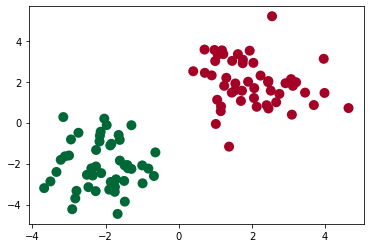

In [3]:
plt.scatter(features.data.numpy()[:, 0], features.data.numpy()[:, 1], c=labels.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

## 2 读取数据

In [4]:
import torch.utils.data as Data

batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(
    dataset,
    batch_size,
    shuffle=True
)

In [5]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[ 2.6591,  0.9970],
        [ 2.5466,  5.1970],
        [ 1.4469,  1.4657],
        [-1.2955, -0.1255],
        [ 0.8971,  2.3092],
        [-1.6445, -0.6009],
        [-2.9993, -1.6040],
        [ 1.6141,  3.3445],
        [ 2.9141,  1.9248],
        [ 3.9586,  3.1187]]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])


## 3 定义模型

In [6]:
net = torch.nn.Sequential(
    torch.nn.Linear(num_inputs, 1),
    torch.nn.Sigmoid() # 多定义一层sigmoid，这样损失函数就不必再进行计算。反之也是一样
)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)


In [7]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.7041,  0.3630]], requires_grad=True)
Parameter containing:
tensor([-0.3822], requires_grad=True)


## 4 初始化模型参数

In [8]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

## 5 定义损失函数

In [9]:
loss = torch.nn.BCELoss()

## 6 定义优化算法

In [10]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## 7 训练模型

In [11]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.374664
epoch 2, loss: 0.238323
epoch 3, loss: 0.152780


## 8 作图观察

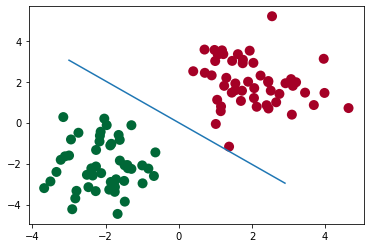

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = torch.arange(-3, 3, 0.1)
with torch.no_grad():
    y = (-net[0].bias.data - net[0].weight[0].data[0]*x) / net[0].weight[0].data[1]
ax.plot(x, y)
ax.scatter(features.data.numpy()[:, 0], features.data.numpy()[:, 1], c=labels.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()